# Predicting the price of a house based on the Area

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Data Exploration

In [2]:
data = pd.read_csv('Housing.csv')

In [3]:
# show top five of the data
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# show bottom five of the data
data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [7]:
# showing the dimension of the data, rows and columns
data.shape

(545, 13)

In [8]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [10]:
# check if there is any duplicate value in the data
data.duplicated().sum()

0

In [11]:
# check if there is null value in the data
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [14]:
# to summarize the statistic data 
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [53]:
data.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [18]:
# Creating a new dataframe from the parent data that We are going to use in this model
df = data[['area', 'price']]
df.head()

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000


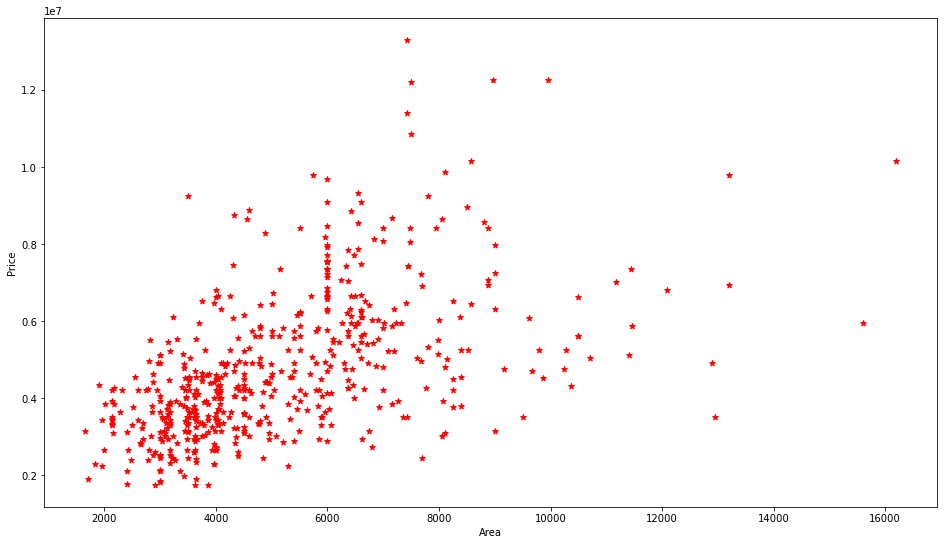

In [27]:
# visualizing the data based on area
plt.figure(figsize = (16,9))
plt.scatter(df.area, df.price, marker = '*', color = 'red')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

### Splitting the dataset

In [29]:
# import function to split our data
from sklearn.model_selection import train_test_split

In [65]:
# splitting data into train and test
x_train, x_test, y_train, y_test = train_test_split( df[['area']], df.price, test_size = 0.2, random_state = 4)

In [66]:
x_train

,area
219,7000
108,3240
63,6360
495,4000
490,4350
...,...
456,2398
360,4040
439,3930
174,3800


In [68]:
y_test

489     2835000
302     4200000
66      6930000
270     4340000
515     2450000
         ...   
303     4200000
103     6195000
6      10150000
128     5873000
139     5740000
Name: price, Length: 109, dtype: int64

### Predicting the model

In [69]:
# here we use simple linear regression to predict the price
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [70]:
# train the model 
model.fit(x_train, y_train)

LinearRegression()

In [60]:
# predict the price of a house
y_predict = model.predict(x_test)
y_predict

array([3883094.8351184 , 3334269.57774715, 8587311.326872  ,
       4453302.8947249 , 3840329.23064792, 4215716.20322219,
       4405785.55642436, 3555225.20084467, 4039902.05151019,
       5375139.2577554 , 4339261.2828036 , 4230921.75147837,
       6591583.11824926, 5394146.19307562, 4144440.19577138,
       5415528.99531086, 3978129.51171949, 5878823.04374114,
       4234723.13854241, 3968626.04405938, 3940115.64107905,
       6235203.0809952 , 4700393.05388772, 6971721.82465359,
       3241610.7680611 , 4049405.5191703 , 4453302.8947249 ,
       4215716.20322219, 3940115.64107905, 8444759.31197038,
       4073164.18832057, 5503436.07116687, 6187685.74269466,
       4842945.06878934, 6163927.07354439, 3997136.4470397 ,
       4880958.93942977, 4044653.78534025, 4453302.8947249 ,
       6392010.29738699, 4453302.8947249 , 4595854.90962652,
       6534562.31228861, 5422656.59605595, 4201461.00173203,
       3265369.43721137, 6163927.07354439, 3982881.24554954,
       4405785.55642436,

In [71]:
# Checking the accuracy of our model
score = model.score(x_test, y_test)
score

0.23943156794933362

#### The accuracy of our data is very less because we choose only one input variable. We can increase  by using multiple input variable.

In [79]:
# to ignore the warnings on the code
import warnings
warnings.filterwarnings('ignore')

In [77]:
# if area = 8000
model.predict([[8000]])

array([6116409.73524385])

### Optional

In [83]:
# This is the value of m in m*x + b equation
model.coef_

array([475.17338301])

In [84]:
# This is the value of b in m*x + b equation
model.intercept_

2315022.67120054

In [86]:
# by using function
y = 475.17338301*8000 + 2315022.67120054
y

6116409.73528054

#### Same as we predict by the help of sklearn Library

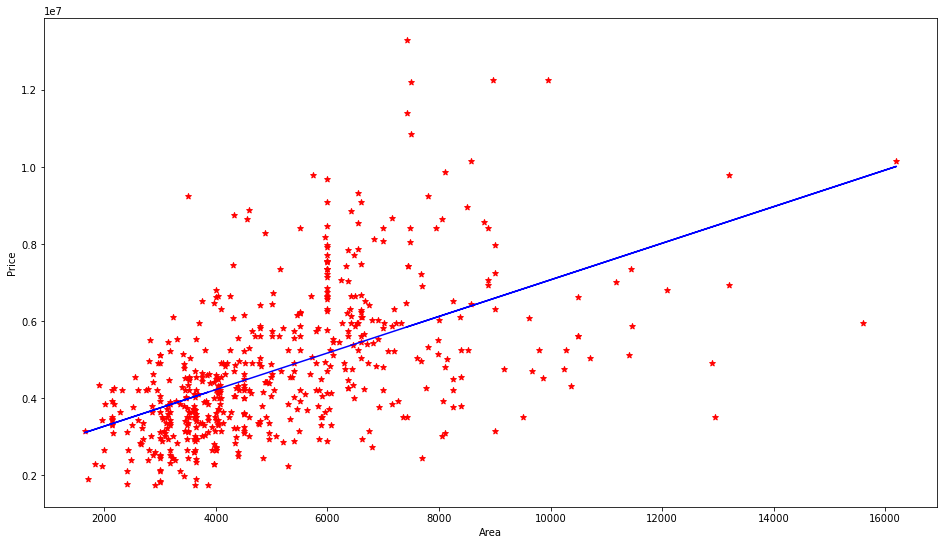

In [88]:
# visualizing the data
plt.figure(figsize = (16,9))
plt.scatter(df.area, df.price, marker = '*', color = 'red')
plt.plot(df.area, model.predict(df[['area']]), color = 'blue')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()